In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# 1. Load data

In [29]:
reg_mq_names = ["mq_1_Sleeplatency", "mq_2_times_awake", "mq_3_time_lay_awake"]
clf_mq_names = [
    "mq_4_calm_sleep",
    "mq_5_superficial_sleep",
    "mq_6_recovery",
    "mq_7_bad_mood",
    "mq_8_energy",
    "mq_9_tense",
    "mq_10_unconcentrated",
]
reg_mq_names, clf_mq_names

(['mq_1_Sleeplatency', 'mq_2_times_awake', 'mq_3_time_lay_awake'],
 ['mq_4_calm_sleep',
  'mq_5_superficial_sleep',
  'mq_6_recovery',
  'mq_7_bad_mood',
  'mq_8_energy',
  'mq_9_tense',
  'mq_10_unconcentrated'])

In [30]:
ss_clf_CV_scores_opti_cont_change_dur = pd.read_csv(
    r"../data/opt_results/ss_clf_CV_scores_opti_cont_change_dur.csv", index_col=0
)
ss_clf_CV_scores_opti_frequency = pd.read_csv(
    r"../data/opt_results/ss_clf_CV_scores_opti_frequency.csv", index_col=0
)
ss_clf_CV_scores_opti_resampled = pd.read_csv(
    r"../data/opt_results/ss_clf_CV_scores_opti_resampled.csv", index_col=0
)
ss_reg_CV_scores_opti_cont_change_dur = pd.read_csv(
    r"../data/opt_results/ss_reg_CV_scores_opti_cont_change_dur.csv", index_col=0
)
ss_reg_CV_scores_opti_frequency = pd.read_csv(
    r"../data/opt_results/ss_reg_CV_scores_opti_frequency.csv", index_col=0
)
ss_reg_CV_scores_opti_resampled = pd.read_csv(
    r"../data/opt_results/ss_reg_CV_scores_opti_resampled.csv", index_col=0
)

In [31]:
ss_clf_hyp_opti_cont_change_dur = pd.read_csv(
    r"../data/opt_results/ss_clf_hyp_opti_cont_change_dur.csv", index_col="model"
)
ss_clf_hyp_opti_frequency = pd.read_csv(
    r"../data/opt_results/ss_clf_hyp_opti_frequency.csv", index_col="model"
)
ss_clf_hyp_opti_resampled = pd.read_csv(
    r"../data/opt_results/ss_clf_hyp_opti_resampled.csv", index_col="model"
)
ss_reg_hyp_opti_cont_change_dur = pd.read_csv(
    r"../data/opt_results/ss_reg_hyp_opti_cont_change_dur.csv", index_col="model"
)
ss_reg_hyp_opti_frequency = pd.read_csv(
    r"../data/opt_results/ss_reg_hyp_opti_frequency.csv", index_col="model"
)
ss_reg_hyp_opti_resampled = pd.read_csv(
    r"../data/opt_results/ss_reg_hyp_opti_resampled.csv", index_col="model"
)

In [32]:
hp_ss = {
    "clf": {
        key: {
            clf_mq_name: val[f"hyp_{clf_mq_name}"].to_dict()
            for clf_mq_name in clf_mq_names
        }
        for key, val in zip(
            [
                "cont_change_dur",
                "frequency",
                "resampled",
            ],
            [
                ss_clf_hyp_opti_cont_change_dur,
                ss_clf_hyp_opti_frequency,
                ss_clf_hyp_opti_resampled,
            ],
        )
    },
    "reg": {
        key: {
            reg_mq_name: val[f"hyp_{reg_mq_name}"].to_dict()
            for reg_mq_name in reg_mq_names
        }
        for key, val in zip(
            [
                "cont_change_dur",
                "frequency",
                "resampled",
            ],
            [
                ss_reg_hyp_opti_cont_change_dur,
                ss_reg_hyp_opti_frequency,
                ss_reg_hyp_opti_resampled,
            ],
        )
    },
}
hp_ss

{'clf': {'cont_change_dur': {'mq_4_calm_sleep': {'LogisticRegression__penalty=None': "[OrderedDict({'model__C': 3.916449174261764})]",
    'LogisticRegression__penalty=l1': "[OrderedDict({'model__C': 0.5958198748137256})]",
    'LogisticRegression__penalty=l2': "[OrderedDict({'model__C': 0.5958198748137256})]",
    'LogisticRegression__penalty=elasticnet': "[OrderedDict({'model__C': 0.5958198748137256, 'model__l1_ratio': 0.9789036584263616})]",
    'KNeighborsClassifier': "[OrderedDict({'model__n_neighbors': 14})]",
    'DecisionTreeClassifier': "[OrderedDict({'model__max_depth': 6})]",
    'RandomForestClassifier': "[OrderedDict({'model__max_depth': 11, 'model__n_estimators': 219})]",
    'AdaBoostClassifier': "[OrderedDict({'model__learning_rate': 0.039164491742617644, 'model__n_estimators': 219})]",
    'SVC': "[OrderedDict({'model__C': 3.916449174261764, 'model__kernel': 'rbf'})]",
    'LinearSVC': "[OrderedDict({'model__C': 0.5958198748137256})]"},
   'mq_5_superficial_sleep': {'L

In [33]:
eeg_clf_optimised_CV_scores_clf_corr9_full = pd.read_csv(
    "../data/opt_results/optimised_CV_scores_clf_corr9_full.csv", index_col=0
)
eeg_clf_optimised_CV_scores_clf_nn = pd.read_csv(
    "../data/opt_results/optimised_CV_scores_clf_nn.csv", index_col=0
)

In [34]:
with open("../data/opt_results/best_params_clf_corr9_full.pkl", "rb") as f:
    eeg_clf_best_params_clf_corr9_full = pickle.load(f)

with open("../data/opt_results/opt_utim_fft.pkl", "rb") as f:
    eeg_clf_opt_utim_fft = pickle.load(f)

with open("../data/opt_results/best_params_clf_nn.pkl", "rb") as f:
    eeg_clf_best_params_clf_nn = pickle.load(f)


eeg_clf_opt_utim_fft
eeg_clf_best_params_clf_nn
eeg_clf_best_params_clf_corr9_full

{'mq_4_calm_sleep': [OrderedDict([('model__C', 3.916449174261764)]),
  OrderedDict([('model__C', 79.6881371691501)]),
  OrderedDict([('model__C', 0.5958198748137256)]),
  OrderedDict([('model__C', 0.6943132838416054),
               ('model__l1_ratio', 0.5353106333247523)]),
  OrderedDict([('model__max_depth', 2)]),
  OrderedDict([('model__max_depth', 4), ('model__n_estimators', 150)]),
  OrderedDict([('model__learning_rate', 0.04628272458390895),
               ('model__n_estimators', 280)]),
  OrderedDict([('model__C', 11.69785455903441), ('model__kernel', 'poly')]),
  OrderedDict([('model__C', 0.10007659108992124)])],
 'mq_5_superficial_sleep': [OrderedDict([('model__C', 3.916449174261764)]),
  OrderedDict([('model__C', 0.5958198748137256)]),
  OrderedDict([('model__C', 0.5958198748137256)]),
  OrderedDict([('model__C', 3.3999077954387857),
               ('model__l1_ratio', 0.5269790313150186)]),
  OrderedDict([('model__max_depth', 8)]),
  OrderedDict([('model__max_depth', 4), ('mo

# Load data

In [35]:
# Classification Models
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multioutput import MultiOutputClassifier


# Regression Models
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    SGDRegressor,
)
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## With SS data

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

# from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import make_column_transformer

from sklearn.ensemble import VotingClassifier
from sleep_eeg.pre_processing.sleep_cycles import assemble_data
from sleep_eeg.pre_processing.mq import compute_class_weights

In [37]:
old_assembled_data, old_predictor_groups = assemble_data(
    drop_mq_grp_par_nig_dru=False, mq_class_percentiles=[0.25, 0.5, 0.75]
)
new_data2 = old_assembled_data
new_data2 = new_data2[new_data2["total_sleep_time"] >= 700]

# new_data.drop(
#     # old_predictor_groups["psd"]
#     # + old_predictor_groups["fourrier"]
#     old_predictor_groups["continuity"]
#     + old_predictor_groups["changements"]
#     + old_predictor_groups["durations_latencies"]
#     + old_predictor_groups["resampled_times_series"],
#     axis=1,
#     inplace=True,
# )  # CHANGE

mq2 = new_data2[old_predictor_groups["mq"]]
new_data2.drop(labels=old_predictor_groups["mq"], axis=1, inplace=True)
mq_class_weights = compute_class_weights(mq2).to_dict()
ohe_cols = ["Sex (1=m, 2=f)"]
ohe_encoder = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ohe_cols),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
ohe_encoder.set_output(transform="pandas")
scaler = StandardScaler()
scaler.set_output(transform="pandas")
constant_remover = VarianceThreshold(threshold=0.0)
constant_remover.set_output(transform="pandas")
preprocess_pipe2 = Pipeline(
    [
        ("One Hot Encoder", ohe_encoder),
        ("Constant Remover", constant_remover),
        ("Scaler", scaler),
    ]
)

C:\Users\camil\AppData\Local\Temp\ipykernel_25672\835205250.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data2.drop(labels=old_predictor_groups["mq"], axis=1, inplace=True)
c:\users\camil\documents\etudes\epfl\master\ma1\ml\project 2\ml-project-2-malm\sleep_eeg\pre_processing\mq.py:74: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  - mq_classified[classified_mq_cols].astype(int).apply(pd.value_counts)


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin


# Custom transformer to select features from each dataset
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        return X[X.columns.intersection(self.columns)]


frequency_selector = ColumnSelector(
    columns=old_predictor_groups["psd"]
    + old_predictor_groups["fourrier"]
    + old_predictor_groups["age_bmi"]
)
resampled_selector = ColumnSelector(
    columns=old_predictor_groups["resampled_times_series"]
    + old_predictor_groups["age_bmi"]
)
cont_change_dur_selector = ColumnSelector(
    columns=old_predictor_groups["continuity"]
    + old_predictor_groups["changements"]
    + old_predictor_groups["durations_latencies"]
    + old_predictor_groups["age_bmi"]
)

## EEG data

In [14]:
from sleep_eeg.utils import rename_nights

In [15]:
extracted_features_data = pd.read_csv("../data/eeg/df_corrected_110.csv", index_col=0)
extracted_features_data.index = rename_nights(extracted_features_data["NAME"])
extracted_features_data.drop(["NAME"], axis=1, inplace=True)
extracted_features_data.dropna(inplace=True)
old_assembled_data, old_predictor_groups = assemble_data(
    drop_mq_grp_par_nig_dru=False, mq_class_percentiles=[0.25, 0.5, 0.75]
)
extracted_features_data.drop(["sex"], axis=1, inplace=True)
from feature_engine.selection import DropCorrelatedFeatures

tr = DropCorrelatedFeatures(variables=None, method="kendall", threshold=0.9)
extracted_features_data = tr.fit_transform(extracted_features_data)
new_data = pd.merge(
    extracted_features_data, old_assembled_data, left_index=True, right_index=True
)
new_data = new_data[new_data["total_sleep_time"] >= 700]
new_data.drop(
    old_predictor_groups["psd"]
    + old_predictor_groups["resampled_times_series"]
    + old_predictor_groups["fourrier"]
    + old_predictor_groups["continuity"]
    + old_predictor_groups["changements"]
    + old_predictor_groups["durations_latencies"],
    axis=1,
    inplace=True,
)
mq = new_data[old_predictor_groups["mq"]]
new_data.drop(labels=old_predictor_groups["mq"], axis=1, inplace=True)
mq_class_weights = compute_class_weights(mq).to_dict()
ohe_cols = ["Sex (1=m, 2=f)"]
standardize_cols = new_data.columns.difference(ohe_cols).to_list()

ohencoder_and_scaler = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ohe_cols),
    (StandardScaler(), standardize_cols),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
ohencoder_and_scaler.set_output(transform="pandas")
constant_remover = VarianceThreshold(threshold=0.0)
constant_remover.set_output(transform="pandas")


preprocess_pipe = Pipeline(
    [
        ("ohencoder_and_scaler", ohencoder_and_scaler),
        ("constant_remover", constant_remover),
    ]
)

# Check if pipeline works
# check_new_data_cleaned = preprocess_pipe.fit_transform(new_data)
# check_new_data_cleaned.shape, new_data.shape

c:\users\camil\documents\etudes\epfl\master\ma1\ml\project 2\ml-project-2-malm\sleep_eeg\pre_processing\mq.py:74: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  - mq_classified[classified_mq_cols].astype(int).apply(pd.value_counts)


# Plot Confusion matrix

mq_4_calm_sleep
RandomForestClassifier
mq_6_recovery
RandomForestClassifier
mq_7_bad_mood
LogisticRegression
mq_8_energy
LogisticRegression
mq_9_tense
AdaBoostClassifier
mq_10_unconcentrated
LogisticRegression


c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


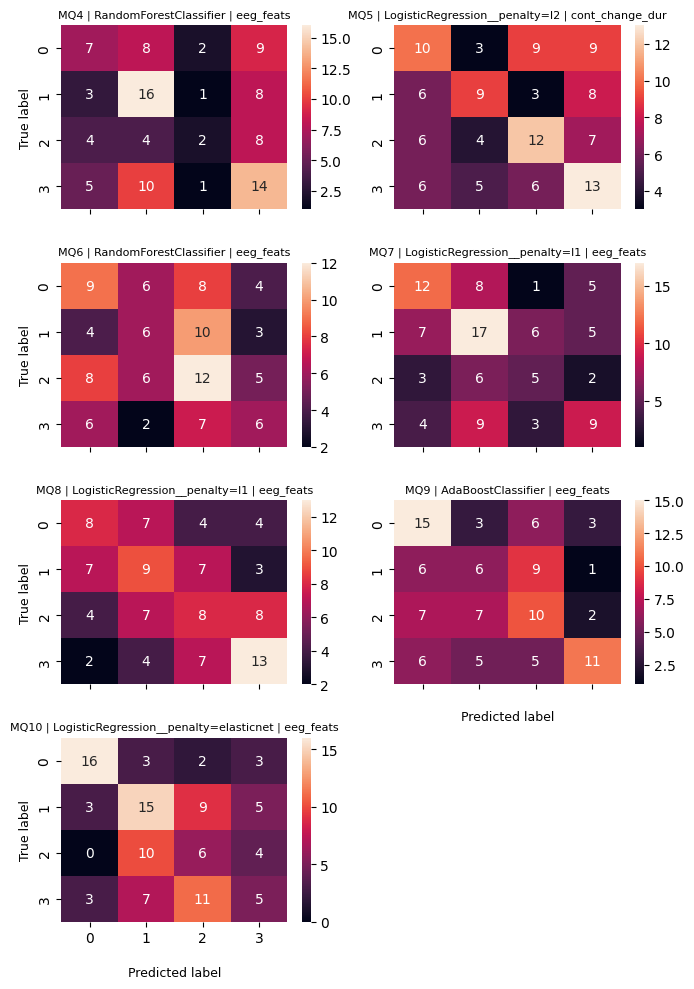

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from copy import deepcopy
from sklearn.metrics import f1_score

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(7, 10))

best_hp = [
    {"max_depth": 4 , "n_estimators": 150},
    {},
    {"max_depth": 16, "n_estimators": 51 },
    {"penalty" : "l1", "solver":"liblinear", "C": 1.0177557208569432},
    {"penalty" : "l1", "solver":"liblinear", "C": 0.3579369823509911},
    {'learning_rate': 0.2414876923135532,'n_estimators': 294},
    {"penalty":"elasticnet", "solver": "saga", "C": 3.8554513400070025 , "l1_ratio": 0.05789784369353025},
]

best_model = [RandomForestClassifier,"autre", RandomForestClassifier, LogisticRegression, LogisticRegression, AdaBoostClassifier, LogisticRegression]
best_model_name = ["RandomForestClassifier", "LogisticRegression__penalty=l2", "RandomForestClassifier", "LogisticRegression__penalty=l1", "LogisticRegression__penalty=l1", "AdaBoostClassifier", "LogisticRegression__penalty=elasticnet" ]

for i, ax in enumerate (axes.flatten()) :
    
    if 7>i :
        
        if best_model[i] == "autre" : 
            
            model = LogisticRegression(random_state=0, penalty="l2", C = 0.5958198748137256)
            
            pipe = Pipeline([
                                ("selector", cont_change_dur_selector ),  # Select relevant features
                                ("preprocessing", preprocess_pipe2)])
            
            pipe.steps.append(("model", model))
            y = mq2[list(eeg_clf_best_params_clf_corr9_full.keys())[i]]
            y_pred = cross_val_predict( pipe,
                new_data2, 
                y,  
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),)
            
            data_name = "cont_change_dur"
            # score = ss_clf_hyp_opti_cont_change_dur["test_score_mq_5_superficial_sleep"][2]
        else : 
            print(list(eeg_clf_best_params_clf_corr9_full.keys())[i])
            print( best_model[i].__name__)
            model = best_model[i](random_state=0, **best_hp[i])
            y = mq[list(eeg_clf_best_params_clf_corr9_full.keys())[i]]
            pipe = deepcopy(preprocess_pipe)
            pipe.steps.append(("model", model))
            y_pred = cross_val_predict( pipe,
                new_data, 
                y,  
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),)
            
            data_name = "eeg_feats"
            # score = np.mean(eeg_clf_optimised_CV_scores_clf_corr9_full[eeg_clf_optimised_CV_scores_clf_corr9_full["y_name"] == list(eeg_clf_best_params_clf_corr9_full.keys())[i]][eeg_clf_optimised_CV_scores_clf_corr9_full["model"] == best_model_name[i]]["test_score"])
        
        
        
        cf_matrix = confusion_matrix(y, y_pred)

        # stats_text = "\n F1 score={:0.3f}".format(score)

        group_counts = ["{0:0.0f}\n".format(value) for value in cf_matrix.flatten()]
        box_labels = [f"{v}".strip() for v in group_counts]
        box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0],cf_matrix.shape[1])

        sns.heatmap(cf_matrix,annot=box_labels,fmt="",cbar= True,xticklabels="auto",yticklabels="auto", ax = ax)
 
        if i == 0 or i == 2 or i == 4 or i == 6 :
            ax.set_ylabel('True label', fontsize = 9)
        if i == 5 or i == 6 :
            ax.set_xlabel('\nPredicted label', fontsize = 9)
        # else : 
        #     ax.set_xlabel(stats_text, fontsize = 9)
        if best_model[i] != "autre" :
            ax.set_title("MQ{} | {} | {}".format(i+4, best_model_name[i], data_name), fontsize = 8)
        else : 
            ax.set_title("MQ{} | {} | {}".format(i+4, best_model_name[i], data_name), fontsize = 8)
            
axes.flatten()[-1].set_visible(False)
plt.tight_layout()

plt.savefig(r"../figures/correlation_matrix_clf_best.png" ,dpi = 400)

# Plot regression identity plot

c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\camil\miniconda3\envs\malm\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


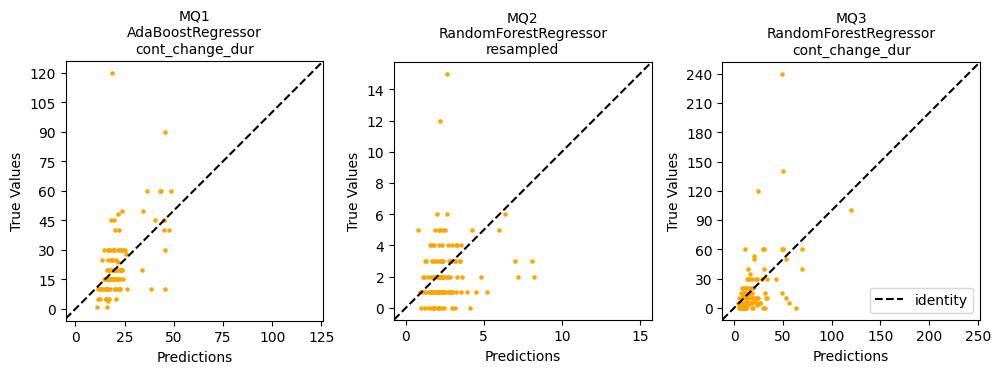

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    AdaBoostRegressor,
    RandomForestRegressor
)

from sklearn.model_selection import cross_val_predict
from copy import deepcopy
from sklearn.metrics import f1_score
import matplotlib.cm as cm

from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(ncols=3, figsize=(10, 10))

best_model = [AdaBoostRegressor, RandomForestRegressor, RandomForestRegressor]
data = ["cont_change_dur", "resampled", "cont_change_dur"]
best_params = [
    {"learning_rate": 0.039164491742617644, 'n_estimators': 219},
    {'max_depth': 6, 'n_estimators': 295},
    {"max_depth": 6, 'n_estimators': 295}]
mq_name = ["mq_1_Sleeplatency", "mq_2_times_awake", "mq_3_time_lay_awake"]

for i, ax in enumerate (axes.flatten()) :
    
        if data[i] == "cont_change_dur" : 
            
            pipeline = Pipeline([
                                ("selector", resampled_selector),  # Select relevant features
                                ("preprocessing", preprocess_pipe2)])
        
        if data[i] == "resampled" :
            
            pipeline = Pipeline([
                                ("selector", cont_change_dur_selector ),  # Select relevant features
                                ("preprocessing", preprocess_pipe2)])
            
             
        model = best_model[i](random_state=0, **best_params[i])
        y = mq2[mq_name[i]]
        
        pipe = deepcopy(pipeline)
        pipe.steps.append(("model", model))
        y_pred = cross_val_predict( pipe,
            new_data2, 
            y,  
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),)
        
        ax.scatter(y_pred, y, s = 5, c = "orange")
        
        ax.set_xlim(ax.get_ylim())
        ax.set_aspect("equal")
        ax.axline((0,0), slope = 1, color='black', linestyle='--', label = "identity")
        ax.set_ylabel('True Values')
        
        if i == 0 : 
            ax.set_ylabel('True Values')
        if i ==2 :
            ax.legend( loc="lower right", fancybox=True)
        ax.set_xlabel('Predictions')
        ax.set_title('MQ{}\n{}\n{}'.format(i+1, best_model[i].__name__, data[i] ), fontsize = 10)       
        ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 
        

plt.tight_layout()

plt.savefig(r"../figures/reg_3best_identity_h.png" ,dpi = 400)